<a href="https://colab.research.google.com/github/JuliusCaesar123/hello/blob/main/GroupB_CIVE202_P4_Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
ia_nri = pd.read_csv("/content/drive/My Drive/Colab Notebooks/Project 4 files/NRI_Table_CensusTracts_Iowa.csv")
sd_nri = pd.read_csv("/content/drive/My Drive/Colab Notebooks/Project 4 files/NRI_Table_CensusTracts_SouthDakota.csv")

ia_svi = pd.read_csv("/content/drive/My Drive/Colab Notebooks/Project 4 files/Iowa_SVI.csv")
sd_svi = pd.read_csv("/content/drive/My Drive/Colab Notebooks/Project 4 files/SouthDakota_SVI.csv")

In [ ]:
#Na values
ia_nri_filled_median = ia_nri.apply(lambda col: col.fillna(col.median()) if col.dtypes != 'O' else col)

print(ia_nri_filled_median)

sd_nri_filled_median = sd_nri.apply(lambda col: col.fillna(col.median()) if col.dtypes != 'O' else col)

print(sd_nri_filled_median)

      OID_        NRI_ID STATE STATEABBRV  STATEFIPS  COUNTY COUNTYTYPE  \
0    29850  T19001960100  Iowa         IA         19   Adair     County   
1    29851  T19001960200  Iowa         IA         19   Adair     County   
2    29852  T19001960300  Iowa         IA         19   Adair     County   
3    29853  T19003950100  Iowa         IA         19   Adams     County   
4    29854  T19003950200  Iowa         IA         19   Adams     County   
..     ...           ...   ...        ...        ...     ...        ...   
891  30741  T19197680100  Iowa         IA         19  Wright     County   
892  30742  T19197680200  Iowa         IA         19  Wright     County   
893  30743  T19197680300  Iowa         IA         19  Wright     County   
894  30744  T19197680400  Iowa         IA         19  Wright     County   
895  30745  T19197680500  Iowa         IA         19  Wright     County   

     COUNTYFIPS  STCOFIPS   TRACT  ...  WNTW_EALS        WNTW_EALR  WNTW_ALRB  \
0             1   

In [ ]:
#joining datasets
ia_nri['STCNTY'] = ia_nri['STCOFIPS']
complete_ia = pd.merge(ia_nri, ia_svi, on = 'STCNTY')

print(complete_ia)

sd_nri['STCNTY'] = sd_nri['STCOFIPS']
complete_sd = pd.merge(ia_nri, ia_svi, on = 'STCNTY')

#complete_sd.columns

        OID_        NRI_ID STATE_x STATEABBRV  STATEFIPS COUNTY_x COUNTYTYPE  \
0      29850  T19001960100    Iowa         IA         19    Adair     County   
1      29850  T19001960100    Iowa         IA         19    Adair     County   
2      29850  T19001960100    Iowa         IA         19    Adair     County   
3      29851  T19001960200    Iowa         IA         19    Adair     County   
4      29851  T19001960200    Iowa         IA         19    Adair     County   
...      ...           ...     ...        ...        ...      ...        ...   
27317  30745  T19197680500    Iowa         IA         19   Wright     County   
27318  30745  T19197680500    Iowa         IA         19   Wright     County   
27319  30745  T19197680500    Iowa         IA         19   Wright     County   
27320  30745  T19197680500    Iowa         IA         19   Wright     County   
27321  30745  T19197680500    Iowa         IA         19   Wright     County   

       COUNTYFIPS  STCOFIPS   TRACT  ..

In [ ]:
#Current NRI Risk Tables using their calculated state percentile for that census tract
#Risk = Expected Annual Loss / (Social Vurnerability / Community Resilience)
#Based on 3 natural disasters per state: Hail, Tornado, and Wildfire

#Iowa NRI risk to hail
print ("Iowa: ")
ia_nri_filled_median['ia_nri_hail_risk'] = ia_nri_filled_median['HAIL_EALT'] * (ia_nri_filled_median['SOVI_SCORE'] / ia_nri_filled_median['RESL_SCORE'])

ia_nri_hail_summary = {
    'Minimum Risk Score': ia_nri_filled_median['ia_nri_hail_risk'].min(),
    'Maximum Risk Score': ia_nri_filled_median['ia_nri_hail_risk'].max(),
    'Mean Risk Score': ia_nri_filled_median['ia_nri_hail_risk'].mean(),
    'Median Risk Score': ia_nri_filled_median['ia_nri_hail_risk'].median()
}

ia_nri_hail_summary = pd.DataFrame(ia_nri_hail_summary, index=[1])

print("   Hail")
print(ia_nri_hail_summary)

#find percentile of each tract within state for hail
ia_nri_filled_median['ia_nri_hail_state_percentile'] = (ia_nri_filled_median['ia_nri_hail_risk'] / ia_nri_filled_median['ia_nri_hail_risk'].max()) *100
print (ia_nri_filled_median['ia_nri_hail_state_percentile'])


#Iowa NRI Tornado risk
ia_nri_filled_median['ia_nri_tornado_risk'] = ia_nri_filled_median['TRND_EALT'] * (ia_nri_filled_median['SOVI_SCORE'] / ia_nri_filled_median['RESL_SCORE'])

ia_nri_tornado_summary = {
    'Minimum Risk Score': ia_nri_filled_median['ia_nri_tornado_risk'].min(),
    'Maximum Risk Score': ia_nri_filled_median['ia_nri_tornado_risk'].max(),
    'Mean Risk Score': ia_nri_filled_median['ia_nri_tornado_risk'].mean(),
    'Median Risk Score': ia_nri_filled_median['ia_nri_tornado_risk'].median()
}

ia_nri_tornado_summary = pd.DataFrame(ia_nri_tornado_summary, index=[1])

print("   Tornado")
print(ia_nri_tornado_summary)

#find percentile of each tract within state for tornado
ia_nri_filled_median['ia_nri_tornado_state_percentile'] = (ia_nri_filled_median['ia_nri_tornado_risk'] / ia_nri_filled_median['ia_nri_tornado_risk'].max()) * 100
print (ia_nri_filled_median['ia_nri_tornado_state_percentile'])


#Iowa NRI Risk to Wildfire
ia_nri_filled_median['ia_nri_wildfire_risk'] = ia_nri_filled_median['WFIR_EALT'] * (ia_nri_filled_median['SOVI_SCORE'] / ia_nri_filled_median['RESL_SCORE'])

ia_nri_wildfire_summary = {
    'Minimum Risk Score': ia_nri_filled_median['ia_nri_wildfire_risk'].min(),
    'Maximum Risk Score': ia_nri_filled_median['ia_nri_wildfire_risk'].max(),
    'Mean Risk Score': ia_nri_filled_median['ia_nri_wildfire_risk'].mean(),
    'Median Risk Score': ia_nri_filled_median['ia_nri_wildfire_risk'].median()
}

ia_nri_wildfire_summary = pd.DataFrame(ia_nri_wildfire_summary, index=[1])

print("   Wildfire")
print(ia_nri_wildfire_summary)

#find percentile of each tract within state for wildfire
ia_nri_filled_median['ia_nri_wildfire_state_percentile'] = (ia_nri_filled_median['ia_nri_wildfire_risk'] / ia_nri_filled_median['ia_nri_wildfire_risk'].max()) * 100
print (ia_nri_filled_median['ia_nri_wildfire_state_percentile'])

print ("\n South Dakota:")

###Calculate the same for South Dakota
#South Dakota risk to hail
sd_nri_filled_median['sd_nri_hail_risk'] = sd_nri_filled_median['HAIL_EALT'] * (sd_nri_filled_median['SOVI_SCORE'] / sd_nri_filled_median['RESL_SCORE'])

sd_nri_hail_summary = {
    'Minimum Risk Score': sd_nri_filled_median['sd_nri_hail_risk'].min(),
    'Maximum Risk Score': sd_nri_filled_median['sd_nri_hail_risk'].max(),
    'Mean Risk Score': sd_nri_filled_median['sd_nri_hail_risk'].mean(),
    'Median Risk Score': sd_nri_filled_median['sd_nri_hail_risk'].median()
}

sd_nri_hail_summary = pd.DataFrame(sd_nri_hail_summary, index=[1])

print("   Hail")
print(sd_nri_hail_summary)

#find percentile of each tract within state for hail
sd_nri_filled_median['sd_nri_hail_state_percentile'] = (sd_nri_filled_median['sd_nri_hail_risk'] / sd_nri_filled_median['sd_nri_hail_risk'].max()) * 100
print (sd_nri_filled_median['sd_nri_hail_state_percentile'])


#South Dakota NRI Tornado risk
sd_nri_filled_median['sd_nri_tornado_risk'] = sd_nri_filled_median['TRND_EALT'] * (sd_nri_filled_median['SOVI_SCORE'] / sd_nri_filled_median['RESL_SCORE'])

sd_nri_tornado_summary = {
    'Minimum Risk Score': sd_nri_filled_median['sd_nri_tornado_risk'].min(),
    'Maximum Risk Score': sd_nri_filled_median['sd_nri_tornado_risk'].max(),
    'Mean Risk Score': sd_nri_filled_median['sd_nri_tornado_risk'].mean(),
    'Median Risk Score': sd_nri_filled_median['sd_nri_tornado_risk'].median()
}

sd_nri_tornado_summary = pd.DataFrame(sd_nri_tornado_summary, index=[1])

print("   Tornado")
print(sd_nri_tornado_summary)


#find percentile of each tract within state for tornado
sd_nri_filled_median['sd_nri_tornado_state_percentile'] = (sd_nri_filled_median['sd_nri_tornado_risk'] / sd_nri_filled_median['sd_nri_tornado_risk'].max()) * 100
print (sd_nri_filled_median['sd_nri_tornado_state_percentile'])

#South Dakota NRI Risk to Wildfire
sd_nri_filled_median['sd_nri_wildfire_risk'] = sd_nri_filled_median['WFIR_EALT'] * (sd_nri_filled_median['SOVI_SCORE'] / sd_nri_filled_median['RESL_SCORE'])

sd_nri_wildfire_summary = {
    'Minimum Risk Score': sd_nri_filled_median['sd_nri_wildfire_risk'].min(),
    'Maximum Risk Score': sd_nri_filled_median['sd_nri_wildfire_risk'].max(),
    'Mean Risk Score': sd_nri_filled_median['sd_nri_wildfire_risk'].mean(),
    'Median Risk Score': sd_nri_filled_median['sd_nri_wildfire_risk'].median()
}

sd_nri_wildfire_summary = pd.DataFrame(sd_nri_wildfire_summary, index=[1])
print("   Wildfire")
print(sd_nri_wildfire_summary)

#find percentile of each tract within state for wildfire
sd_nri_filled_median['sd_nri_wildfire_state_percentile'] = (sd_nri_filled_median['sd_nri_wildfire_risk'] / sd_nri_filled_median['sd_nri_wildfire_risk'].max()) * 100
print (sd_nri_filled_median['sd_nri_wildfire_state_percentile'])

Iowa: 
   Hail
   Minimum Risk Score  Maximum Risk Score  Mean Risk Score  Median Risk Score
1            0.976456       435825.540612     39769.545672       19788.715226
0      59.784436
1      17.877376
2      33.994098
3      17.059477
4      30.259089
         ...    
891    17.805531
892     0.514496
893    25.380673
894     5.259033
895    13.460657
Name: ia_nri_hail_state_percentile, Length: 896, dtype: float64
   Tornado
   Minimum Risk Score  Maximum Risk Score  Mean Risk Score  Median Risk Score
1           72.733941        5.076261e+06    176631.870461      116575.710299
0      7.768898
1      1.941632
2      6.663861
3      2.395350
4      6.884787
         ...   
891    4.456683
892    0.112580
893    8.126315
894    0.936892
895    5.406150
Name: ia_nri_tornado_state_percentile, Length: 896, dtype: float64
   Wildfire
   Minimum Risk Score  Maximum Risk Score  Mean Risk Score  Median Risk Score
1                 0.0        54366.862041      1341.725085         290.301315


In [ ]:
#calculate risk with our definitions

#Iowa First; find max population, max expected annual loss - composite total
ia_max_pop = ia_nri_filled_median['POPULATION'].max()
life_worth = 13000000

#Calculate risk of hail for Iowa under our definition.
#calculate top part of equation
ia_nri_filled_median['ia_impact_composite_hail'] = ia_nri_filled_median['POPULATION'] * life_worth * ia_nri_filled_median['HAIL_EALT']
#scale it to a percentage of the maximum
ia_nri_filled_median['ia_hail_impact'] = ia_nri_filled_median['ia_impact_composite_hail'] / ia_nri_filled_median['ia_impact_composite_hail'].max()

#find the probability of hail in each Iowa census tract
ia_nri_filled_median['ia_prob_composite_hail'] = ia_nri_filled_median['HAIL_EVNTS'] * ia_nri_filled_median['HAIL_AFREQ']
#scale it to a percentage of the maximum
ia_nri_filled_median['ia_hail_prob'] = ia_nri_filled_median['ia_prob_composite_hail'] / ia_nri_filled_median['ia_prob_composite_hail'].max()


ia_nri_filled_median['ia_composite_risk_hail'] = ia_nri_filled_median['ia_hail_impact'] * ia_nri_filled_median['ia_hail_prob']

#print (ia_nri_filled_median['ia_composite_risk_hail'])

#Creates risk for each census tract as a percent of the highest risk tract in the state.
ia_nri_filled_median['ia_risk_hail'] = (ia_nri_filled_median['ia_composite_risk_hail'] / ia_nri_filled_median['ia_composite_risk_hail'].max()) * 100

ia_hail_summary = {
    'Minimum Risk Score': ia_nri_filled_median['ia_risk_hail'].min(),
    'Maximum Risk Score': ia_nri_filled_median['ia_risk_hail'].max(),
    'Mean Risk Score': ia_nri_filled_median['ia_risk_hail'].mean(),
    'Median Risk Score': ia_nri_filled_median['ia_risk_hail'].median()
}
print (ia_nri_filled_median['ia_risk_hail'])
print (ia_hail_summary)




0      43.125594
1      21.866983
2      29.535749
3      12.771749
4      12.211994
         ...    
891    10.887220
892     3.107716
893     9.152549
894     2.735247
895     5.952159
Name: ia_risk_hail, Length: 896, dtype: float64
{'Minimum Risk Score': 0.0, 'Maximum Risk Score': 100.0, 'Mean Risk Score': np.float64(9.163910269972332), 'Median Risk Score': 5.5295460179257745}


In [ ]:
#Calculate risk of tornado for Iowa under our definition.
#calculate top part of equation
ia_nri_filled_median['ia_impact_composite_tornado'] = ia_nri_filled_median['POPULATION'] * life_worth * ia_nri_filled_median['TRND_EALT']
#scale it to a percentage of the maximum
ia_nri_filled_median['ia_tornado_impact'] = ia_nri_filled_median['ia_impact_composite_tornado'] / ia_nri_filled_median['ia_impact_composite_tornado'].max()

#find the probability of hail in each Iowa census tract
ia_nri_filled_median['ia_prob_composite_tornado'] = ia_nri_filled_median['TRND_EVNTS'] * ia_nri_filled_median['TRND_AFREQ']
#scale it to a percentage of the maximum
ia_nri_filled_median['ia_tornado_prob'] = ia_nri_filled_median['ia_prob_composite_tornado'] / ia_nri_filled_median['ia_prob_composite_tornado'].max()


ia_nri_filled_median['ia_composite_risk_tornado'] = ia_nri_filled_median['ia_tornado_impact'] * ia_nri_filled_median['ia_tornado_prob']

#print (ia_nri_filled_median['ia_composite_risk_tornado'])

#Creates risk for each census tract as a percent of the highest risk tract in the state.
ia_nri_filled_median['ia_risk_tornado'] = (ia_nri_filled_median['ia_composite_risk_tornado'] / ia_nri_filled_median['ia_composite_risk_tornado'].max()) * 100

ia_tornado_summary = {
    'Minimum Risk Score': ia_nri_filled_median['ia_risk_tornado'].min(),
    'Maximum Risk Score': ia_nri_filled_median['ia_risk_tornado'].max(),
    'Mean Risk Score': ia_nri_filled_median['ia_risk_tornado'].mean(),
    'Median Risk Score': ia_nri_filled_median['ia_risk_tornado'].median()
}
print (ia_nri_filled_median['ia_risk_tornado'])
print (ia_tornado_summary)

0      32.260490
1      11.279609
2       1.182000
3      13.836126
4       2.269495
         ...    
891    13.844085
892     1.421946
893     4.741035
894     1.839554
895     0.187375
Name: ia_risk_tornado, Length: 896, dtype: float64
{'Minimum Risk Score': 0.0, 'Maximum Risk Score': 100.0, 'Mean Risk Score': np.float64(3.5754443704403873), 'Median Risk Score': 0.09846393333746825}


In [ ]:
#Calculate risk of wildfire for Iowa under our definition.
#calculate top part of equation
ia_nri_filled_median['ia_impact_composite_wildfire'] = ia_nri_filled_median['POPULATION'] * life_worth * ia_nri_filled_median['WFIR_EALT']
#scale it to a percentage of the maximum
ia_nri_filled_median['ia_wildfire_impact'] = ia_nri_filled_median['ia_impact_composite_wildfire'] / ia_nri_filled_median['ia_impact_composite_wildfire'].max()

#find the probability of hail in each Iowa census tract
ia_nri_filled_median['ia_prob_composite_wildfire'] = ia_nri_filled_median['WFIR_EVNTS'] * ia_nri_filled_median['WFIR_AFREQ']
#scale it to a percentage of the maximum
ia_nri_filled_median['ia_wildfire_prob'] = ia_nri_filled_median['ia_prob_composite_wildfire'] / ia_nri_filled_median['ia_prob_composite_wildfire'].max()


ia_nri_filled_median['ia_composite_risk_wildfire'] = ia_nri_filled_median['ia_wildfire_impact'] * ia_nri_filled_median['ia_wildfire_prob']

#print (ia_nri_filled_median['ia_composite_risk_wildfire'])

#Creates risk for each census tract as a percent of the highest risk tract in the state.
ia_nri_filled_median['ia_risk_wildfire'] = (ia_nri_filled_median['ia_composite_risk_wildfire'] / ia_nri_filled_median['ia_composite_risk_wildfire'].max()) * 100

ia_wildfire_summary = {
    'Minimum Risk Score': ia_nri_filled_median['ia_risk_wildfire'].min(),
    'Maximum Risk Score': ia_nri_filled_median['ia_risk_wildfire'].max(),
    'Mean Risk Score': ia_nri_filled_median['ia_risk_wildfire'].mean(),
    'Median Risk Score': ia_nri_filled_median['ia_risk_wildfire'].median()
}
print (ia_nri_filled_median['ia_risk_wildfire'])
print (ia_wildfire_summary)

#Risk of wildfire in Iowa comes out to 0 because there were no annual events in Iowa in the year 2022 apparently.

0     NaN
1     NaN
2     NaN
3     NaN
4     NaN
       ..
891   NaN
892   NaN
893   NaN
894   NaN
895   NaN
Name: ia_risk_wildfire, Length: 896, dtype: float64
{'Minimum Risk Score': nan, 'Maximum Risk Score': nan, 'Mean Risk Score': nan, 'Median Risk Score': nan}


# SOUTH DAKOTA HAIL, TORNADO, AND WILDFIRE RISK

## Hail

In [ ]:
#calculate risk with our definitions

#South Dakota First; find max population, max expected annual loss - composite total
#create function with constants
def sd_constants():
  sd_max_pop = sd_nri_filled_median['POPULATION'].max()
  life_worth = 13000000

sd_constants()

#Calculate risk of hail for South Dakota under our definition.
#calculate top part of equation
sd_nri_filled_median['sd_impact_composite_hail'] = sd_nri_filled_median['POPULATION'] * life_worth * sd_nri_filled_median['HAIL_EALT']
#scale it to a percentage of the maximum
sd_nri_filled_median['sd_hail_impact'] = sd_nri_filled_median['sd_impact_composite_hail'] / sd_nri_filled_median['sd_impact_composite_hail'].max()

#find the probability of hail in each South Dakota census tract
sd_nri_filled_median['sd_prob_composite_hail'] = sd_nri_filled_median['HAIL_EVNTS'] * sd_nri_filled_median['HAIL_AFREQ']
#scale it to a percentage of the maximum
sd_nri_filled_median['sd_hail_prob'] = sd_nri_filled_median['sd_prob_composite_hail'] / sd_nri_filled_median['sd_prob_composite_hail'].max()


sd_nri_filled_median['sd_composite_risk_hail'] = sd_nri_filled_median['sd_hail_impact'] * sd_nri_filled_median['sd_hail_prob']

#print (sd_nri_filled_median['sd_composite_risk_hail'])

#Creates risk for each census tract as a percent of the highest risk tract in the state.
sd_nri_filled_median['sd_risk_hail'] = (sd_nri_filled_median['sd_composite_risk_hail'] / sd_nri_filled_median['sd_composite_risk_hail'].max()) * 100

sd_hail_summary = {
    'Minimum Risk Score': sd_nri_filled_median['sd_risk_hail'].min(),
    'Maximum Risk Score': sd_nri_filled_median['sd_risk_hail'].max(),
    'Mean Risk Score': sd_nri_filled_median['sd_risk_hail'].mean(),
    'Median Risk Score': sd_nri_filled_median['sd_risk_hail'].median()
}
print (sd_nri_filled_median['sd_risk_hail'])
print (sd_hail_summary)


0       8.536671
1       0.393371
2       0.343443
3       0.184683
4       0.465835
         ...    
237    78.521222
238    48.061693
239    89.509809
240    89.657457
241     1.750588
Name: sd_risk_hail, Length: 242, dtype: float64
{'Minimum Risk Score': 0.1846826110645665, 'Maximum Risk Score': 100.0, 'Mean Risk Score': np.float64(18.71951755195207), 'Median Risk Score': 11.616590910924577}


## Tornado

In [ ]:
#call the function containing the constants
sd_constants()

#Calculate risk of tornado for South Dakota under our definition.
#calculate top part of equation
sd_nri_filled_median['sd_impact_composite_tornado'] = sd_nri_filled_median['POPULATION'] * life_worth * sd_nri_filled_median['TRND_EALT']
#scale it to a percentage of the maximum
sd_nri_filled_median['sd_tornado_impact'] = sd_nri_filled_median['sd_impact_composite_tornado'] / sd_nri_filled_median['sd_impact_composite_tornado'].max()

#find the probability of hail in each South Dakota census tract
sd_nri_filled_median['sd_prob_composite_tornado'] = sd_nri_filled_median['TRND_EVNTS'] * sd_nri_filled_median['TRND_AFREQ']
#scale it to a percentage of the maximum
sd_nri_filled_median['sd_tornado_prob'] = sd_nri_filled_median['sd_prob_composite_tornado'] / sd_nri_filled_median['sd_prob_composite_tornado'].max()


sd_nri_filled_median['sd_composite_risk_tornado'] = sd_nri_filled_median['sd_tornado_impact'] * sd_nri_filled_median['sd_tornado_prob']

#print (sd_nri_filled_median['sd_composite_risk_tornado'])

#Creates risk for each census tract as a percent of the highest risk tract in the state.
sd_nri_filled_median['sd_risk_tornado'] = (sd_nri_filled_median['sd_composite_risk_tornado'] / sd_nri_filled_median['sd_composite_risk_tornado'].max()) * 100

sd_tornado_summary = {
    'Minimum Risk Score': sd_nri_filled_median['sd_risk_tornado'].min(),
    'Maximum Risk Score': sd_nri_filled_median['sd_risk_tornado'].max(),
    'Mean Risk Score': sd_nri_filled_median['sd_risk_tornado'].mean(),
    'Median Risk Score': sd_nri_filled_median['sd_risk_tornado'].median()
}
print (sd_nri_filled_median['sd_risk_tornado'])
print (sd_tornado_summary)


0      16.478701
1       6.811461
2       2.912013
3       0.000000
4       0.000000
         ...    
237     0.215754
238     0.436111
239     0.048739
240    44.165208
241     1.308371
Name: sd_risk_tornado, Length: 242, dtype: float64
{'Minimum Risk Score': 0.0, 'Maximum Risk Score': 100.0, 'Mean Risk Score': np.float64(4.648093417076737), 'Median Risk Score': 0.10037834780297933}


## Wildfire

In [ ]:
#call the function containing the constants
sd_constants()

#Calculate risk of wildfire for South Dakota under our definition.
#calculate top part of equation
sd_nri_filled_median['sd_impact_composite_wildfire'] = sd_nri_filled_median['POPULATION'] * life_worth * sd_nri_filled_median['WFIR_EALT']
#scale it to a percentage of the maximum
sd_nri_filled_median['sd_wildfire_impact'] = sd_nri_filled_median['sd_impact_composite_wildfire'] / sd_nri_filled_median['sd_impact_composite_wildfire'].max()

#find the probability of hail in each South Dakota census tract
sd_nri_filled_median['sd_prob_composite_wildfire'] = sd_nri_filled_median['WFIR_EVNTS'] * sd_nri_filled_median['WFIR_AFREQ']
#scale it to a percentage of the maximum
sd_nri_filled_median['sd_wildfire_prob'] = sd_nri_filled_median['sd_prob_composite_wildfire'] / sd_nri_filled_median['sd_prob_composite_wildfire'].max()


sd_nri_filled_median['sd_composite_risk_wildfire'] = sd_nri_filled_median['sd_wildfire_impact'] * sd_nri_filled_median['sd_wildfire_prob']

#print (sd_nri_filled_median['sd_composite_risk_wildfire'])

#Creates risk for each census tract as a percent of the highest risk tract in the state.
sd_nri_filled_median['sd_risk_wildfire'] = (sd_nri_filled_median['sd_composite_risk_wildfire'] / sd_nri_filled_median['sd_composite_risk_wildfire'].max()) * 100

sd_wildfire_summary = {
    'Minimum Risk Score': sd_nri_filled_median['sd_risk_wildfire'].min(),
    'Maximum Risk Score': sd_nri_filled_median['sd_risk_wildfire'].max(),
    'Mean Risk Score': sd_nri_filled_median['sd_risk_wildfire'].mean(),
    'Median Risk Score': sd_nri_filled_median['sd_risk_wildfire'].median()
}
print (sd_nri_filled_median['sd_risk_wildfire'])
print (sd_wildfire_summary)

#Risk of wildfire in South Dakota comes out to 0 because there were no annual events in South Dakota in the year 2022 apparently.


0     NaN
1     NaN
2     NaN
3     NaN
4     NaN
       ..
237   NaN
238   NaN
239   NaN
240   NaN
241   NaN
Name: sd_risk_wildfire, Length: 242, dtype: float64
{'Minimum Risk Score': nan, 'Maximum Risk Score': nan, 'Mean Risk Score': nan, 'Median Risk Score': nan}


# Graphing

## NRI Risk Per Census Tract (Percentile)

### Hail Iowa

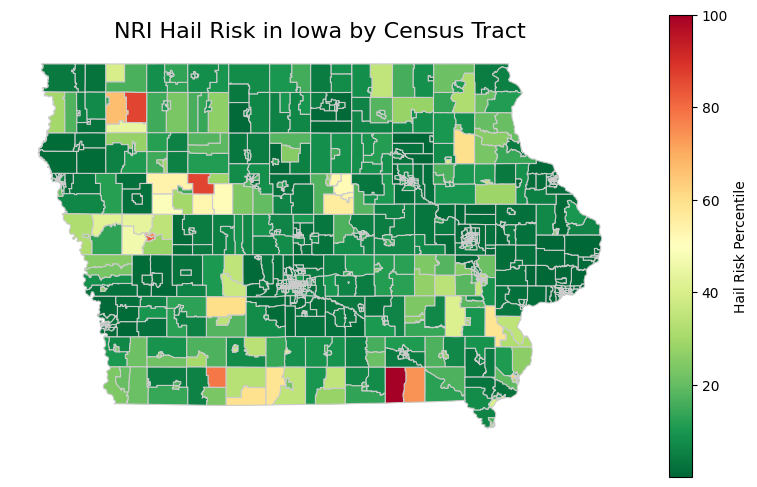

In [ ]:
import geopandas as gpd

# Load national census tracts shapefile from google drive for Iowa
ia_tracts = gpd.read_file("/content/drive/My Drive/Colab Notebooks/Project 4 files/tl_2022_19_tract")

# Merge on GEOID (census tract identifier)
#Create GEOID column that matches the TRACTFIPS to merge on
ia_nri_filled_median['GEOID'] = ia_nri_filled_median['TRACTFIPS'].astype(int).astype(str).str.zfill(11)

#Merge on new GEOID column
ia_merged = ia_tracts.merge(ia_nri_filled_median, on='GEOID')


import matplotlib.pyplot as plt


# Plot the choropleth
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
ia_merged.plot(column='ia_nri_hail_state_percentile', cmap='RdYlGn_r', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True, legend_kwds={'label': "Hail Risk Percentile", 'shrink': 0.6})

# Optional tweaks
ax.set_title('NRI Hail Risk in Iowa by Census Tract', fontdict={'fontsize': 16})
ax.axis('off')

plt.show()

### Tornado Iowa

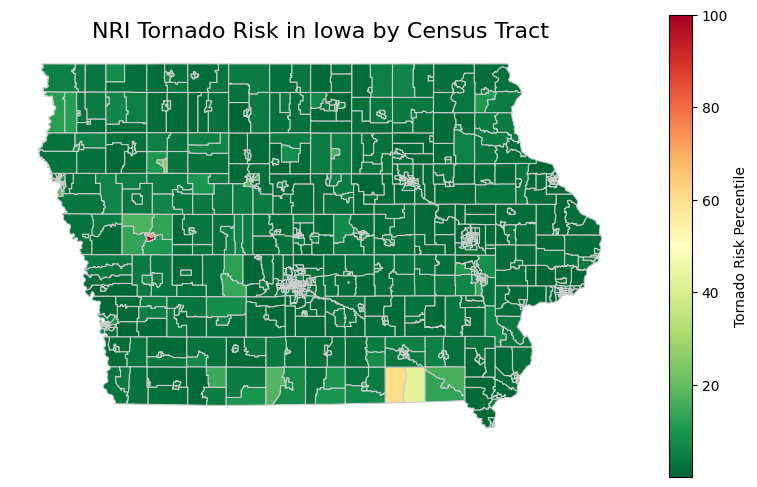

In [ ]:
# Plot the choropleth
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
ia_merged.plot(column='ia_nri_tornado_state_percentile', cmap='RdYlGn_r', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True, legend_kwds={'label': "Tornado Risk Percentile", 'shrink': 0.6})

# Optional tweaks
ax.set_title('NRI Tornado Risk in Iowa by Census Tract', fontdict={'fontsize': 16})
ax.axis('off')

plt.show()

### Wildfire Iowa

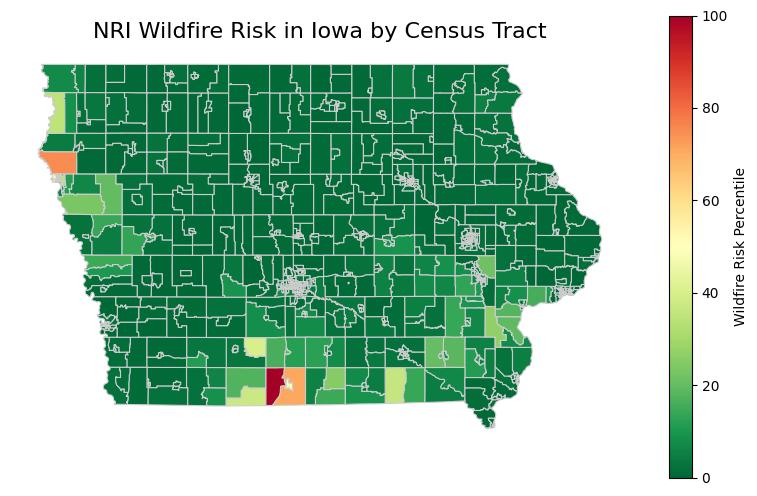

In [ ]:
# Plot the choropleth
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
ia_merged.plot(column='ia_nri_wildfire_state_percentile', cmap='RdYlGn_r', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True, legend_kwds={'label': "Wildfire Risk Percentile", 'shrink': 0.6})

# Optional tweaks
ax.set_title('NRI Wildfire Risk in Iowa by Census Tract', fontdict={'fontsize': 16})
ax.axis('off')

plt.show()

### South Dakota Hail

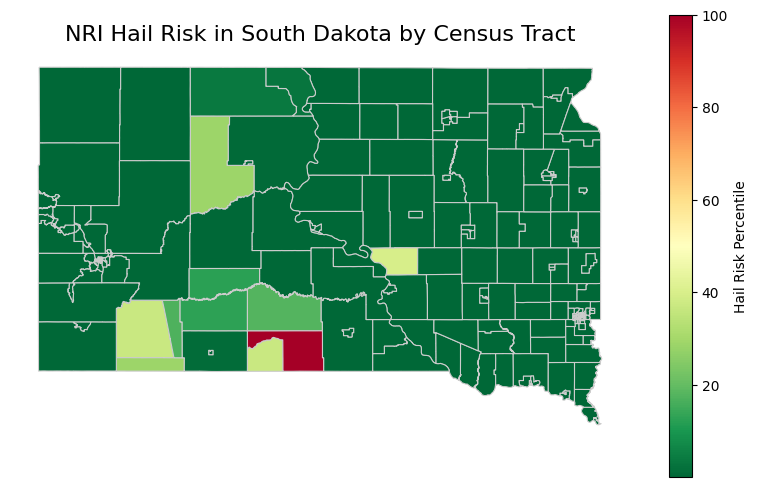

In [ ]:
import geopandas as gpd

# Load national census tracts shapefile from Google Drive for South Dakota
sd_tracts = gpd.read_file("/content/drive/My Drive/Colab Notebooks/Project 4 files/tl_2022_46_tract")

# Merge on GEOID (census tract identifier)
# Create GEOID column that matches the TRACTFIPS to merge on
sd_nri_filled_median['GEOID'] = sd_nri_filled_median['TRACTFIPS'].astype(int).astype(str).str.zfill(11)

# Merge on new GEOID column
sd_merged = sd_tracts.merge(sd_nri_filled_median, on='GEOID')

import matplotlib.pyplot as plt

# Plot the choropleth
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
sd_merged.plot(column='sd_nri_hail_state_percentile', cmap='RdYlGn_r', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True, legend_kwds={'label': "Hail Risk Percentile", 'shrink': 0.6})

# Optional tweaks
ax.set_title('NRI Hail Risk in South Dakota by Census Tract', fontdict={'fontsize': 16})
ax.axis('off')

plt.show()

### South Dakota Tornado

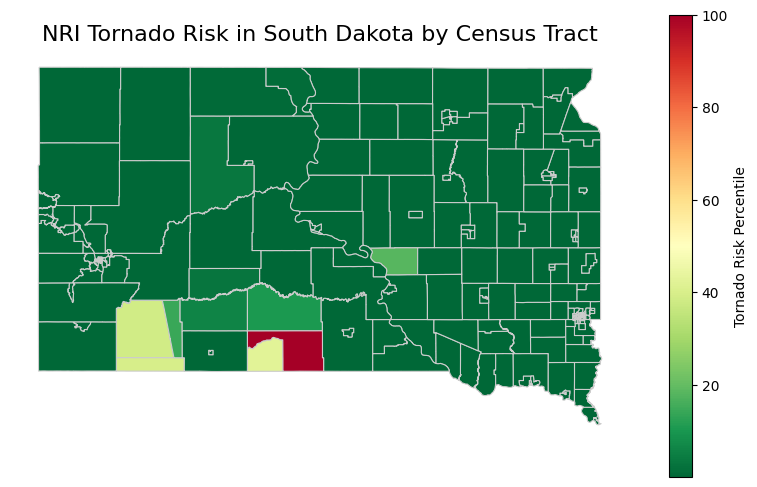

In [ ]:
# Plot the choropleth
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
sd_merged.plot(column='sd_nri_tornado_state_percentile', cmap='RdYlGn_r', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True, legend_kwds={'label': "Tornado Risk Percentile", 'shrink': 0.6})

# Optional tweaks
ax.set_title('NRI Tornado Risk in South Dakota by Census Tract', fontdict={'fontsize': 16})
ax.axis('off')

plt.show()

### South Dakota Wildfire

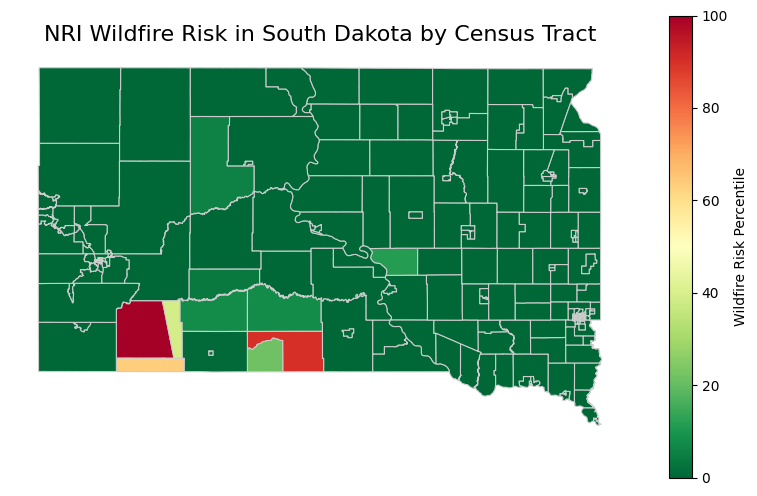

In [ ]:
# Plot the choropleth
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
sd_merged.plot(column='sd_nri_wildfire_state_percentile', cmap='RdYlGn_r', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True, legend_kwds={'label': "Wildfire Risk Percentile", 'shrink': 0.6})

# Optional tweaks
ax.set_title('NRI Wildfire Risk in South Dakota by Census Tract', fontdict={'fontsize': 16})
ax.axis('off')

plt.show()


## Grapthing by our Risk Definition
### Iowa Hail

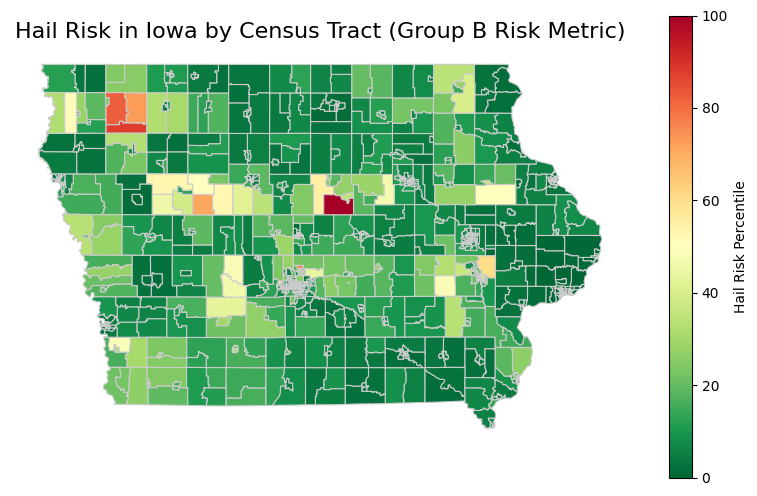

In [ ]:
# Plot the choropleth
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
ia_merged.plot(column='ia_risk_hail', cmap='RdYlGn_r', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True, legend_kwds={'label': "Hail Risk Percentile", 'shrink': 0.6})

# Optional tweaks
ax.set_title('Hail Risk in Iowa by Census Tract (Group B Risk Metric)', fontdict={'fontsize': 16})
ax.axis('off')

plt.show()

### Iowa Tornado Risk (Group B Risk Metric)

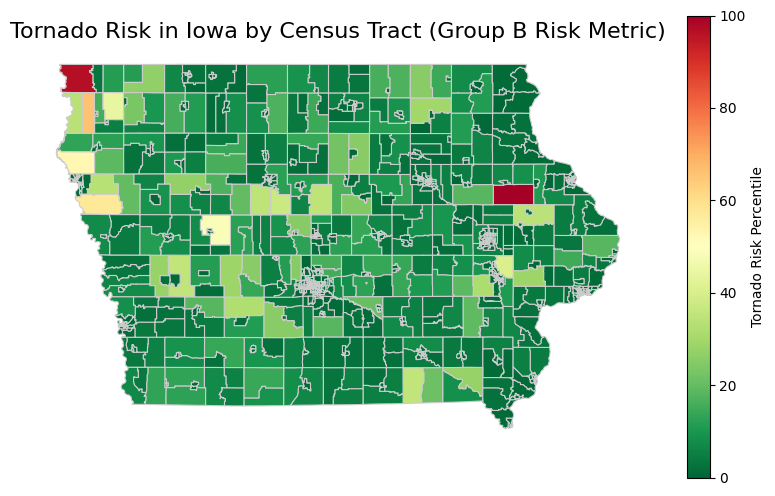

In [ ]:
# Plot the choropleth
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
ia_merged.plot(column='ia_risk_tornado', cmap='RdYlGn_r', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True, legend_kwds={'label': "Tornado Risk Percentile", 'shrink': 0.6})

# Optional tweaks
ax.set_title('Tornado Risk in Iowa by Census Tract (Group B Risk Metric)', fontdict={'fontsize': 16})
ax.axis('off')

plt.show()

### Iowa Wildfire Risk (Group B Risk Metric)

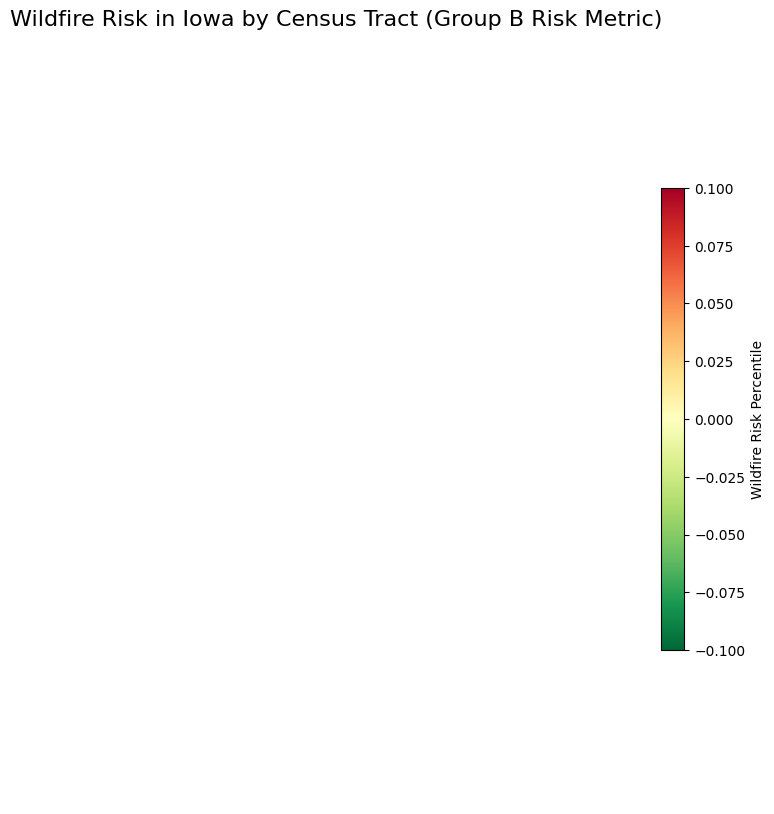

In [ ]:
# Plot the choropleth
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
ia_merged.plot(column='ia_risk_wildfire', cmap='RdYlGn_r', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True, legend_kwds={'label': "Wildfire Risk Percentile", 'shrink': 0.6})

# Optional tweaks
ax.set_title('Wildfire Risk in Iowa by Census Tract (Group B Risk Metric)', fontdict={'fontsize': 16})
ax.axis('off')

plt.show()

### South Dakota Hail Risk (Group B Risk Metric)

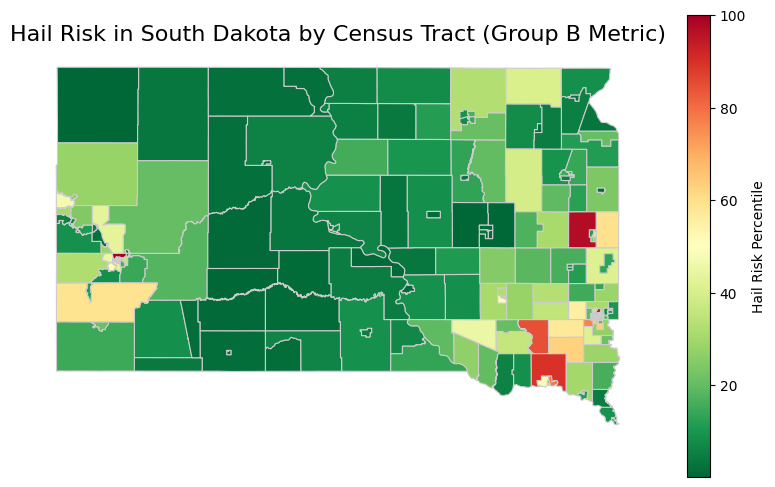

In [ ]:
# Plot the choropleth
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
sd_merged.plot(column='sd_risk_hail', cmap='RdYlGn_r', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True, legend_kwds={'label': "Hail Risk Percentile", 'shrink': 0.6})

# Optional tweaks
ax.set_title('Hail Risk in South Dakota by Census Tract (Group B Metric)', fontdict={'fontsize': 16})
ax.axis('off')

plt.show()

### South Dakota Tornado Risk (Group B Risk Metric)

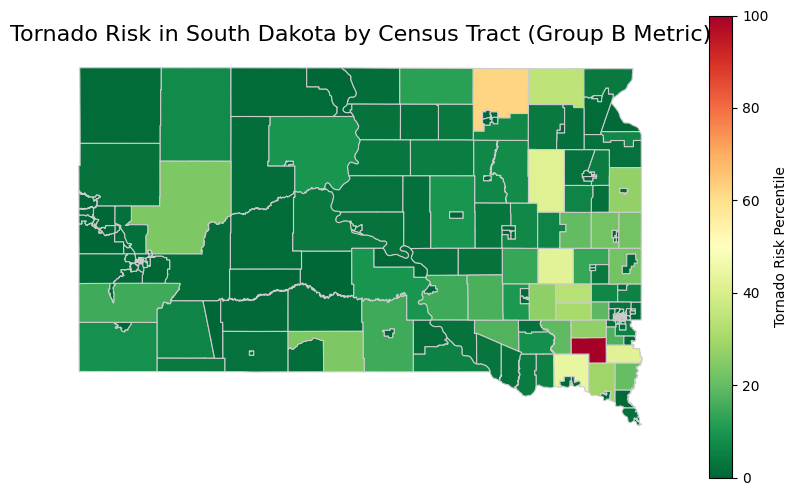

In [ ]:
# Plot the choropleth
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
sd_merged.plot(column='sd_risk_tornado', cmap='RdYlGn_r', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True, legend_kwds={'label': "Tornado Risk Percentile", 'shrink': 0.6})

# Optional tweaks
ax.set_title('Tornado Risk in South Dakota by Census Tract (Group B Metric)', fontdict={'fontsize': 16})
ax.axis('off')

plt.show()

### South Dakota Wildfire Risk (Group B Risk Metric)

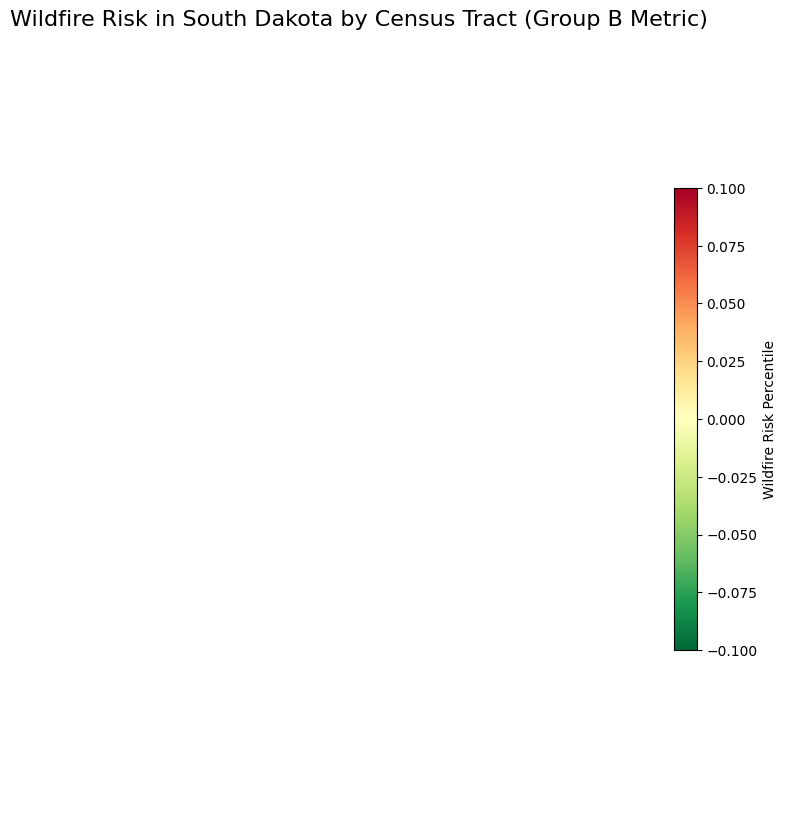

In [ ]:
# Plot the choropleth
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
sd_merged.plot(column='sd_risk_wildfire', cmap='RdYlGn_r', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True, legend_kwds={'label': "Wildfire Risk Percentile", 'shrink': 0.6})

# Optional tweaks
ax.set_title('Wildfire Risk in South Dakota by Census Tract (Group B Metric)', fontdict={'fontsize': 16})
ax.axis('off')

plt.show()